# Credit Card Spend Prediction

In [121]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
cc_users_data = pd.read_csv('CREDIT CARD USERS DATA.csv')

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cc_users_data.shape

(5000, 132)

In [5]:
cc_users_data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [6]:
cc_users_data.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=132)

In [15]:
cc_users_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 131 columns):
custid               object
region               float64
townsize             object
gender               float64
age                  float64
agecat               float64
birthmonth           object
ed                   float64
edcat                float64
jobcat               float64
union                float64
employ               float64
empcat               float64
retire               float64
income               float64
lninc                float64
inccat               float64
debtinc              float64
creddebt             float64
lncreddebt           object
othdebt              float64
lnothdebt            object
default              float64
jobsat               float64
marital              float64
spoused              float64
spousedcat           float64
reside               float64
pets                 float64
pets_cats            float64
pets_dogs            float6

## Data Cleaning

### We can see there are some numerical columns incorrectly marked as type object

In [19]:
cc_users_data['lnwireten'].head() # because of #NULL! values

0    #NULL!
1      7.43
2    #NULL!
3    #NULL!
4      6.02
Name: lnwireten, dtype: object

In [52]:
# check for missing values
cc_users_data.isnull().any().sum() # There are missing values but not NaN

0

In [53]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.townsize[cc_users_data.townsize == '#NULL!'] = np.nan
cc_users_data.townsize = cc_users_data.townsize.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lncreddebt[cc_users_data.lncreddebt == '#NULL!'] = np.nan
cc_users_data.lncreddebt = cc_users_data.lncreddebt.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lnothdebt[cc_users_data.lnothdebt == '#NULL!'] = np.nan
cc_users_data.lnothdebt = cc_users_data.lnothdebt.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.commutetime[cc_users_data.commutetime == '#NULL!'] = np.nan
cc_users_data.commutetime = cc_users_data.commutetime.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.longten[cc_users_data.longten == '#NULL!'] = np.nan
cc_users_data.longten = cc_users_data.longten.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lnlongten[cc_users_data.lnlongten == '#NULL!'] = np.nan
cc_users_data.lnlongten = cc_users_data.lnlongten.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lntollmon[cc_users_data.lntollmon == '#NULL!'] = np.nan
cc_users_data.lntollmon = cc_users_data.lntollmon.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lntollten[cc_users_data.lntollten == '#NULL!'] = np.nan
cc_users_data.lntollten = cc_users_data.lntollten.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lnequipmon[cc_users_data.lnequipmon == '#NULL!'] = np.nan
cc_users_data.lnequipmon = cc_users_data.lnequipmon.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lnequipten[cc_users_data.lnequipten == '#NULL!'] = np.nan
cc_users_data.lnequipten = cc_users_data.lnequipten.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lncardmon[cc_users_data.lncardmon == '#NULL!'] = np.nan
cc_users_data.lncardmon = cc_users_data.lncardmon.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.cardten[cc_users_data.cardten == '#NULL!'] = np.nan
cc_users_data.cardten = cc_users_data.cardten.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lncardten[cc_users_data.lncardten == '#NULL!'] = np.nan
cc_users_data.lncardten = cc_users_data.lncardten.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lnwiremon[cc_users_data.lnwiremon == '#NULL!'] = np.nan
cc_users_data.lnwiremon = cc_users_data.lnwiremon.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
# Correct the type of the numerical features
# If #NULL! mark as NA
cc_users_data.lnwireten[cc_users_data.lnwireten == '#NULL!'] = np.nan
cc_users_data.lnwireten = cc_users_data.lnwireten.astype(float)

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
# check for missing values again
cc_users_data.isnull().any().sum() # There are missing values

15

In [69]:
cc_users_data.isnull().sum()

custid            0
region            0
townsize          2
gender            0
age               0
agecat            0
birthmonth        0
ed                0
edcat             0
jobcat            0
union             0
employ            0
empcat            0
retire            0
income            0
lninc             0
inccat            0
debtinc           0
creddebt          0
lncreddebt        1
othdebt           0
lnothdebt         1
default           0
jobsat            0
marital           0
spoused           0
spousedcat        0
reside            0
pets              0
pets_cats         0
               ... 
cardten           2
lncardten      1422
wireless          0
wiremon           0
lnwiremon      3656
wireten           0
lnwireten      3656
multline          0
voice             0
pager             0
internet          0
callid            0
callwait          0
forward           0
confer            0
ebill             0
owntv             0
hourstv           0
ownvcr            0


In [70]:
# Handle missing values
cc_users_data.fillna(cc_users_data.median(), inplace=True)

### Primary Response Variables
1. cardspent	Amount spent on primary card last month
2. card2spent	Amount spent on secondary card last month

In [83]:
cc_users_data['Credit_Card_Spend'] = cc_users_data['cardspent'] + cc_users_data['card2spent']
# cardspent & card2spent can be dropped now as they will be highly correlated with Credit_Card_Spend
cc_users_data.drop(['cardspent','card2spent'],axis=1,inplace=True)

In [84]:
cc_users_data['Credit_Card_Spend'].describe()

count    5000.00000
mean      498.07863
std       351.52927
min         8.11000
25%       276.28250
50%       414.25000
75%       615.56250
max      4881.05000
Name: Credit_Card_Spend, dtype: float64

### Handling Categorical Variables

In [213]:
# Separating the categorical variables
cat_columns = ['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat',
              'retire','inccat','default','jobsat','marital','spousedcat','homeown','hometype','address',
              'addresscat','cars','carown','cartype','carcatvalue','carbought','carbuy','commute','commutecat',
              'commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
              'commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty',
              'polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
              'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast',
              'churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
              'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod',
              'owngame','ownfax','news','response_01','response_02','response_03']

In [215]:
cat_columns.remove('birthmonth')

In [216]:
cc_users_data[cat_columns] = cc_users_data[cat_columns].astype(int)

In [218]:
cat_columns.append('birthmonth')

In [221]:
cc_users_data[cat_columns] = pd.Categorical(cc_users_data[cat_columns])

In [223]:
cc_users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 131 entries, custid to Credit_Card_Spend
dtypes: float64(46), object(85)
memory usage: 5.0+ MB


### Identify High Correlated Features

In [224]:
# Create correlation matrix
corr_matrix = cc_users_data.drop(cat_columns,axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [225]:
to_drop

['longten']

In [226]:
# pets, pets_cats, pets_dogs etc. are correlated
to_drop.append('pets')

### Splitting the dataset into train and test

In [227]:
# use only numerical for linear regression
num_data = cc_users_data.drop(cat_columns,axis=1)
to_drop.append('Credit_Card_Spend')
to_drop.append('custid')
X = num_data.drop(to_drop, axis=1)
Y = num_data['Credit_Card_Spend']
X1, X2, Y1, Y2 = train_test_split(X, Y, random_state=7)

In [228]:
# scale the data
sc = StandardScaler().fit(X1)
sc1 = sc.transform(X1)
sc2 = sc.transform(X2)

## Linear Regression & Feature Importance

In [229]:
lm=LinearRegression()
lm.fit(sc1,Y1)
print("Train:",np.sqrt(mean_squared_error(lm.predict(sc1),Y1)))
print("Test:",np.sqrt(mean_squared_error(lm.predict(sc2),Y2)))

Train: 264.30346784184877
Test: 278.629397794202


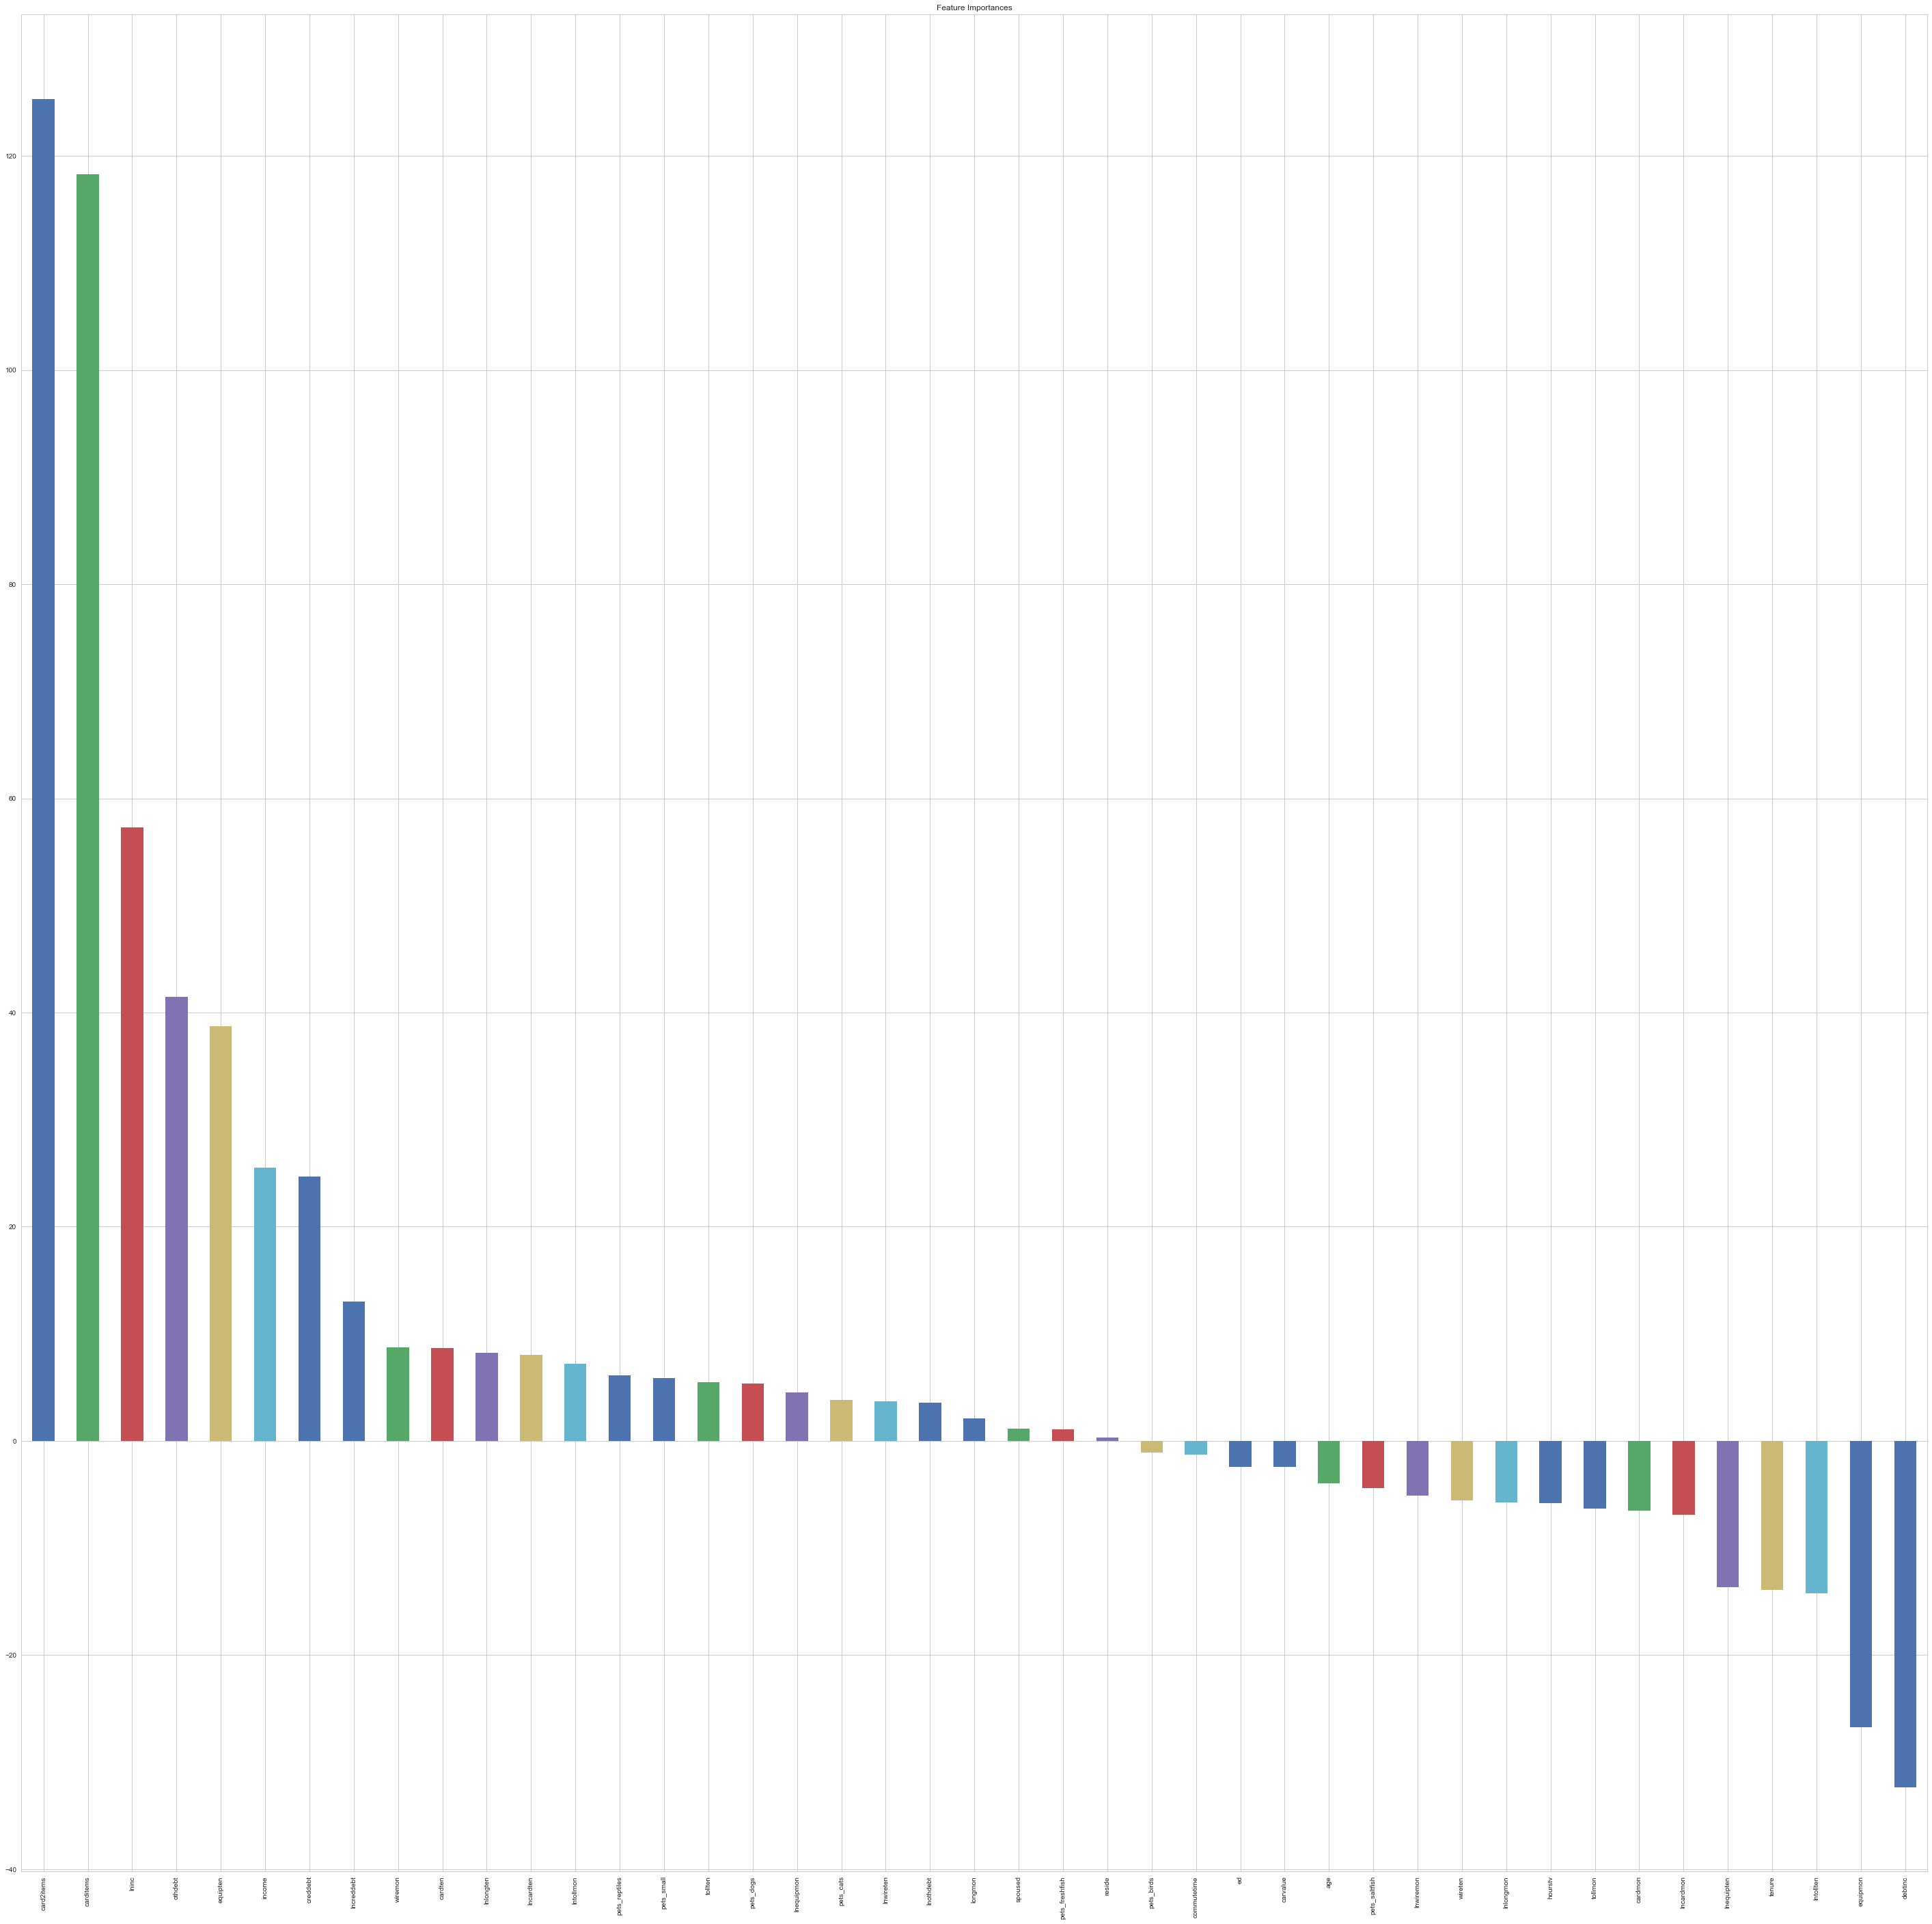

In [230]:
Series(lm.coef_, X.columns).sort_values(ascending=False).plot(kind='bar', figsize=(50,50), title='Feature Importances')

In [231]:
Series(lm.coef_, X.columns).sort_values(ascending=False)[:20]

card2items       125.335297
carditems        118.311045
lninc             57.284404
othdebt           41.485555
equipten          38.717831
income            25.530065
creddebt          24.660528
lncreddebt        12.990523
wiremon            8.760134
cardten            8.672381
lnlongten          8.215036
lncardten          8.032036
lntollmon          7.198955
pets_reptiles      6.095774
pets_small         5.844506
tollten            5.500149
pets_dogs          5.336122
lnequipmon         4.508552
pets_cats          3.818254
lnwireten          3.679116
dtype: float64

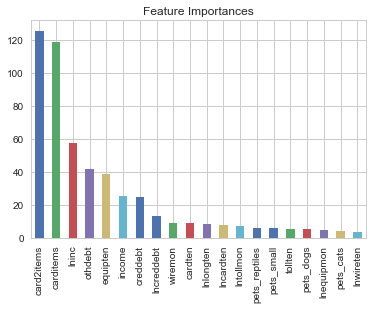

In [232]:
Series(lm.coef_, X.columns).sort_values(ascending=False)[:20].plot(kind='bar', title='Feature Importances')

In [233]:
Series(lm.coef_, X.columns).sort_values(ascending=True)[:20]

debtinc          -32.320151
equipmon         -26.744246
lntollten        -14.215487
tenure           -13.884783
lnequipten       -13.676367
lncardmon         -6.915380
cardmon           -6.509392
tollmon           -6.349118
hourstv           -5.806736
lnlongmon         -5.728449
wireten           -5.566951
lnwiremon         -5.098003
pets_saltfish     -4.379601
age               -3.955116
carvalue          -2.454655
ed                -2.443806
commutetime       -1.247748
pets_birds        -1.109154
reside             0.288674
pets_freshfish     1.104209
dtype: float64

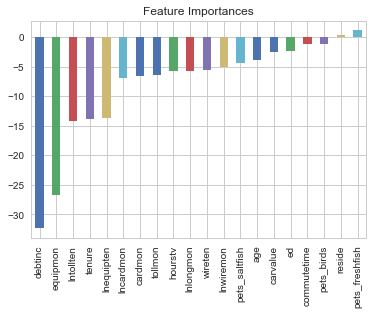

In [235]:
Series(lm.coef_, X.columns).sort_values(ascending=True)[:20].plot(kind='bar', title='Feature Importances')

### Predictions

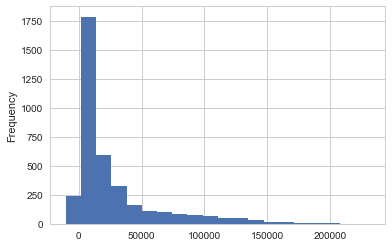

In [236]:
Series(lm.predict(X1)-Y1).plot.hist(bins=20)

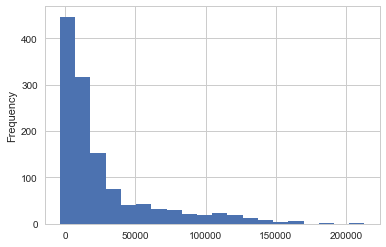

In [237]:
Series(lm.predict(X2)-Y2).plot.hist(bins=20)

## Random Forest & Feature Importance

In [239]:
# train-test split
# try all features for random forest
X = cc_users_data.drop(['Credit_Card_Spend','custid'], axis=1)
Y = cc_users_data['Credit_Card_Spend']
X1, X2, Y1, Y2 = train_test_split(X, Y, random_state=7)

In [244]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X2.columns.values:
    # Encoding only categorical variables
    if X2[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X1[col].append(X2[col])
        le.fit(data.values)
        X1[col]=le.transform(X1[col])
        X2[col]=le.transform(X2[col])

/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/kanuamit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [245]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, max_features='auto', 
                           min_samples_split=1200, max_depth=10, min_samples_leaf=75)
rf.fit(X1,Y1)
print("Train:",np.sqrt(mean_squared_error(rf.predict(X1),Y1)))
print("Test:",np.sqrt(mean_squared_error(rf.predict(X2),Y2)))

Train: 309.3848661089335
Test: 312.4864798613381


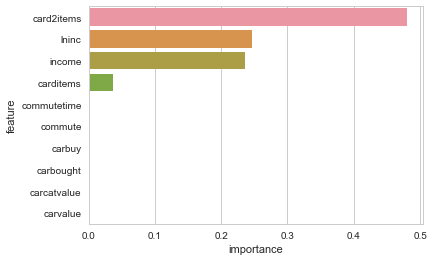

In [248]:
indices = np.argsort(rf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X1.shape[1]):
    feature_rank.loc[f] = [f+1,
                         X1.columns[indices[f]],
                         rf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank[:10] )

In [249]:
# prediction
rf_test_pred = pd.DataFrame( { 'actual':  Y2,
                            'predicted': rf.predict(X2) } )
rf_test_pred.head()

,actual,predicted
3406,633.67,536.919232
757,779.83,490.094467
3624,130.80,316.958750
4544,436.89,699.169718
3235,265.92,498.495189


## Conclusion:

Basis the feature importance derived from both regression as well as random forest, following are the top factors driving the total card spends (Primary Card + Secondary Card):
    1. card2items - Number of items on secondary card last month
    2. carditems - Number of items on primary card last month
    3. lninc - Log-income i.e. consider 'income' as the important factor
    4. othdebt - Other debt in thousands
    5. equipten - Equipment over tenure